In [ ]:
#This problem has not been solved completey. To be reviewed later

In [433]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import matplotlib.dates
from datetime import datetime

In [434]:
sep = pd.read_csv('Sept11Travel.csv', thousands = ',')

In [435]:
sep.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


In [436]:
regsep = sep[['Month', 'Air RPM (000s)']]

In [437]:
regsep.head()

,Month,Air RPM (000s)
0,Jan-90,35153577
1,Feb-90,32965187
2,Mar-90,39993913
3,Apr-90,37981886
4,May-90,38419672


In [438]:
regsep2 = regsep.copy()

In [439]:
# convert the date information to a datetime object
regsep['Date'] = pd.to_datetime(regsep.Month, format='%b-%y')

# convert dataframe column to series (name is used to label the data)
regsep_ts = pd.Series(regsep['Air RPM (000s)'].values, index=regsep.Date, name='Airline')

# define the time series frequency
regsep_ts.index = pd.DatetimeIndex(regsep_ts.index, freq=regsep_ts.index.inferred_freq)

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [440]:
pre_event = regsep_ts['01-1990':'08-2001']
#post_event = regsep_ts['09-2001':'05-2004']

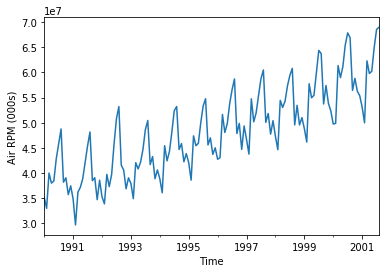

In [441]:
# plot the series
ax = pre_event.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Air RPM (000s)')

plt.show()

The components that appear are trend and seasonality

The method that will be adequate for forecasting the series shown in Figure 17.11 is linear regression model with trend and seasonality

The outcome variable is AIR RPM. The predictors are t, t2 and 11 dummies for months.

In [442]:
regsep2.head(5)

,Month,Air RPM (000s)
0,Jan-90,35153577
1,Feb-90,32965187
2,Mar-90,39993913
3,Apr-90,37981886
4,May-90,38419672


In [443]:
jan_data = regsep2[pd.to_datetime(regsep2['Month'], format = '%b-%y').dt.strftime('%b') == 'Jan']

In [444]:
jan_data = jan_data.reset_index(drop = True)

In [445]:
jan_data

,Month,Air RPM (000s)
0,Jan-90,35153577
1,Jan-91,34848290
2,Jan-92,35265807
3,Jan-93,37911556
4,Jan-94,38863562
5,Jan-95,42050940
6,Jan-96,42734234
7,Jan-97,46692784
8,Jan-98,47290992
9,Jan-99,48861094


In [446]:
janpre = jan_data[0:12]

In [447]:
janpre

,Month,Air RPM (000s)
0,Jan-90,35153577
1,Jan-91,34848290
2,Jan-92,35265807
3,Jan-93,37911556
4,Jan-94,38863562
5,Jan-95,42050940
6,Jan-96,42734234
7,Jan-97,46692784
8,Jan-98,47290992
9,Jan-99,48861094


In [448]:
janpre['Date'] = pd.to_datetime(janpre.Month, format='%b-%y')

# convert dataframe column to series (name is used to label the data)
janpre_ts = pd.Series(janpre['Air RPM (000s)'].values, index=janpre.Date, name='Adj_Airline')

# define the time series frequency
janpre_ts.index = pd.DatetimeIndex(janpre_ts.index, freq=janpre_ts.index.inferred_freq)



C:\Users\GETHSEMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [449]:
# fit a linear trend model to the time series 
air_df = tsatools.add_trend(janpre_ts, trend='ct')
#air_df['Month'] = air_df.index.month

In [450]:
air_df

,Adj_Airline,const,trend
Date,,,
1990-01-01,35153577,1.0,1.0
1991-01-01,34848290,1.0,2.0
1992-01-01,35265807,1.0,3.0
1993-01-01,37911556,1.0,4.0
1994-01-01,38863562,1.0,5.0
1995-01-01,42050940,1.0,6.0
1996-01-01,42734234,1.0,7.0
1997-01-01,46692784,1.0,8.0
1998-01-01,47290992,1.0,9.0


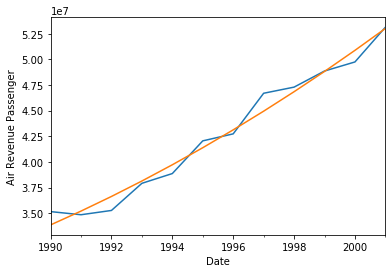

In [452]:
air_lm_poly = sm.ols(formula = 'Adj_Airline ~ trend + np.square(trend)', data = air_df).fit()

ax = janpre_ts.plot()
air_lm_poly.predict(air_df).plot(ax=ax)
ax.set_ylabel('Air Revenue Passenger')

plt.show()

In [453]:
print(air_lm_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            Adj_Airline   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     204.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.18e-08
Time:                        16:05:06   Log-Likelihood:                -181.48
No. Observations:                  12   AIC:                             369.0
Df Residuals:                       9   BIC:                             370.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.259e+07   1.07e+06  

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
